In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess
from scipy import stats
from scipy.stats import linregress
import seaborn as sns
import datetime as dt

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB

sns.set()

In [2]:
data = pd.read_csv("clean_bike_data.csv")
data = data.dropna()
data

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME
0,Theft of Bicycle,2003,1,1,0,0,30XX W 4TH AVE,Kitsilano,49.268399,-123.172906,2003-01-01 00:00:00
1,Theft of Bicycle,2003,1,1,0,0,6X KEEFER PL,Central Business District,49.279617,-123.106816,2003-01-01 00:00:00
2,Theft of Bicycle,2003,1,1,0,5,11XX HORNBY ST,Central Business District,49.278700,-123.127790,2003-01-01 00:05:00
4,Theft of Bicycle,2003,1,2,1,0,10XX JERVIS ST,West End,49.284857,-123.131873,2003-01-02 01:00:00
5,Theft of Bicycle,2003,1,3,0,19,2XX N TEMPLETON DR,Grandview-Woodland,49.286784,-123.059743,2003-01-03 00:19:00
...,...,...,...,...,...,...,...,...,...,...,...
30974,Theft of Bicycle,2019,10,22,13,45,20XX W 4TH AVE,Kitsilano,49.268138,-123.151383,2019-10-22 13:45:00
30975,Theft of Bicycle,2019,10,22,18,15,27XX W BROADWAY AVE,Kitsilano,49.264101,-123.167048,2019-10-22 18:15:00
30976,Theft of Bicycle,2019,10,22,20,34,63XX YEW ST,Kerrisdale,49.228779,-123.158805,2019-10-22 20:34:00
30977,Theft of Bicycle,2019,10,23,22,48,39XX W 38TH AVE,Dunbar-Southlands,49.237564,-123.191084,2019-10-23 22:48:00


In [18]:
weatherData = pd.read_csv("cleanedWeatherData.csv", parse_dates = ["DATE/TIME"])
weatherData = weatherData.drop(["DATE/TIME","MINUTE"], axis=1)
weatherData

,YEAR,MONTH,DAY,HOUR,WEATHER,DATE
0,2016,1,1,1,Clear,2016-01-01
1,2016,1,1,4,Clear,2016-01-01
2,2016,1,1,7,Clear,2016-01-01
3,2016,1,1,10,Clear,2016-01-01
4,2016,1,1,13,Clear,2016-01-01
...,...,...,...,...,...,...
14818,2019,10,31,10,Cloudy,2019-10-31
14819,2019,10,31,13,Cloudy,2019-10-31
14820,2019,10,31,16,Mainly Clear,2019-10-31
14821,2019,10,31,19,Mainly Clear,2019-10-31


In [21]:
crimeDataWithWeather = pd.merge(data, weatherData,  how='inner', on=['YEAR','MONTH','DAY', 'HOUR'])
crimeDataWithWeather

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,LAT,LON,DATETIME,WEATHER,DATE
0,Theft of Bicycle,2016,1,1,1,0,X W PENDER ST,Central Business District,49.280575,-123.104599,2016-01-01 01:00:00,Clear,2016-01-01
1,Theft of Bicycle,2016,1,1,13,0,20XX YUKON ST,Mount Pleasant,49.267030,-123.112791,2016-01-01 13:00:00,Clear,2016-01-01
2,Theft of Bicycle,2016,1,1,13,15,11XX GILFORD ST,West End,49.289316,-123.141747,2016-01-01 13:15:00,Clear,2016-01-01
3,Theft of Bicycle,2016,1,2,12,45,ALBERNI ST / DENMAN ST,West End,49.292193,-123.134398,2016-01-02 12:45:00,Fog,2016-01-02
4,Theft of Bicycle,2016,1,3,13,0,12XX HOWE ST,Central Business District,49.277741,-123.127376,2016-01-03 13:00:00,Mainly Clear,2016-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3282,Theft of Bicycle,2019,10,21,11,13,COMMERCIAL DR / E 4TH AVE,Grandview-Woodland,49.266874,-123.069700,2019-10-21 11:13:00,Rain,2019-10-21
3283,Theft of Bicycle,2019,10,21,14,30,8XX W GEORGIA ST,Central Business District,49.283192,-123.119155,2019-10-21 14:30:00,Rain,2019-10-21
3284,Theft of Bicycle,2019,10,22,7,0,9X E 24TH AVE,Riley Park,49.249501,-123.103066,2019-10-22 07:00:00,Cloudy,2019-10-22
3285,Theft of Bicycle,2019,10,22,13,45,20XX W 4TH AVE,Kitsilano,49.268138,-123.151383,2019-10-22 13:45:00,Mostly Cloudy,2019-10-22


In [40]:
le_neigh = preprocessing.LabelEncoder()
le_block = preprocessing.LabelEncoder()
# le_weath = preprocessing.LabelEncoder()

df_class = data.copy(deep=True)
df_class["NEIGHBOURHOOD"] = df_class["NEIGHBOURHOOD"].apply(lambda x: str(x))
df_class["HUNDRED_BLOCK"] = df_class["HUNDRED_BLOCK"].apply(lambda x: str(x))
# df_class["WEATHER"] = df_class["WEATHER"]


le_neigh.fit(df_class["NEIGHBOURHOOD"])
df_class["NEIGHBOURHOOD"] = le_neigh.transform(df_class["NEIGHBOURHOOD"])

le_block.fit(df_class["HUNDRED_BLOCK"])
df_class["HUNDRED_BLOCK"] = le_block.transform(df_class["HUNDRED_BLOCK"])

# le_weath.fit(df_class["WEATHER"])
# df_class["WEATHER"] = le_weath.transform(df_class["WEATHER"])

In [53]:
X = df_class[["MONTH", "DAY", "HOUR", "MINUTE", "HUNDRED_BLOCK"]]
y = df_class["NEIGHBOURHOOD"]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)

model = DecisionTreeClassifier(max_depth=19)
model.fit(X_train, y_train)

model1 = GaussianNB()
model1.fit(X_train, y_train)

model2 = KNeighborsClassifier(n_neighbors=20)
model2.fit(X_train, y_train)

print(model.score(X_train, y_train))
print(model.score(X_valid, y_valid))
print()

print(model1.score(X_train, y_train))
print(model1.score(X_valid, y_valid))
print()

print(model2.score(X_train, y_train))
print(model2.score(X_valid, y_valid))
print()

0.9461398806950808
0.8227437759336099

0.29324803319789056
0.2807313278008299

0.6140745223480591
0.5779304979253111



In [45]:
model3 = RandomForestClassifier(n_estimators=50, max_depth=5, min_samples_leaf=10)
model3.fit(X_train, y_train)

model4 = GradientBoostingClassifier(n_estimators=50, max_depth=15, min_samples_leaf=10)
model4.fit(X_train, y_train)

print(model3.score(X_train, y_train))
print(model3.score(X_valid, y_valid))
print()

print(model4.score(X_train, y_train))
print(model4.score(X_valid, y_valid))
print()

0.39232298781014957
0.3733143153526971

0.997492867640702
0.8431016597510373



In [6]:
df_n = data.groupby(data["NEIGHBOURHOOD"]).size().reset_index(name='COUNT').sort_values("COUNT")
df_n["PROB"] = df_n["COUNT"].apply(lambda x: (x/sum(df_n["COUNT"])))
print(df_n)

df_b = data.groupby([data["NEIGHBOURHOOD"], data["HUNDRED_BLOCK"]]).size().reset_index(name='COUNT')
print(df_b)
print(len(df_b.HUNDRED_BLOCK.unique()))

                NEIGHBOURHOOD  COUNT      PROB
12                   Musqueam      9  0.000292
21        Victoria-Fraserview    164  0.005317
16                Shaughnessy    164  0.005317
0               Arbutus Ridge    209  0.006776
7                  Kerrisdale    210  0.006808
8                   Killarney    214  0.006938
13                   Oakridge    241  0.007813
18               Stanley Park    253  0.008202
17               South Cambie    277  0.008980
2           Dunbar-Southlands    286  0.009272
10                    Marpole    309  0.010018
20                     Sunset    314  0.010180
23            West Point Grey    444  0.014394
5            Hastings-Sunrise    469  0.015205
14        Renfrew-Collingwood    515  0.016696
15                 Riley Park    756  0.024509
6    Kensington-Cedar Cottage   1041  0.033748
19                 Strathcona   1274  0.041302
4          Grandview-Woodland   1685  0.054626
9                   Kitsilano   2873  0.093140
11           

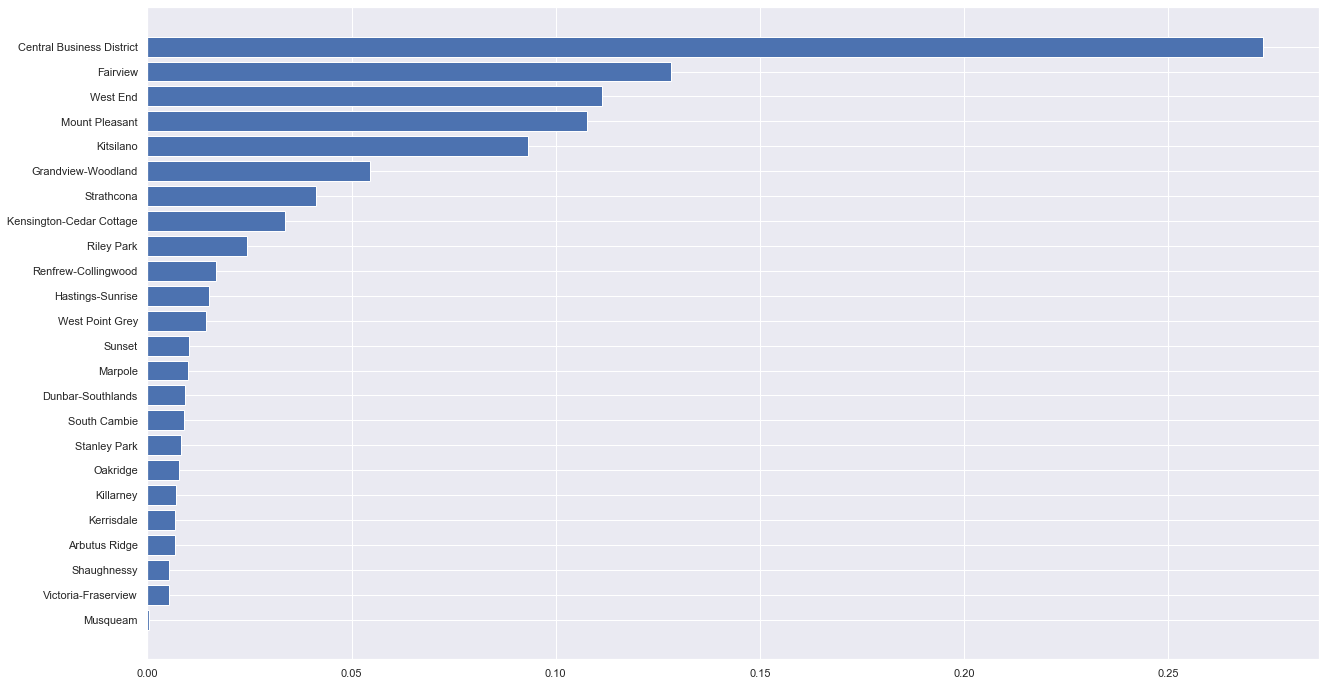

In [7]:
plt.figure(figsize=(21, 12))
plt.barh(df_n["NEIGHBOURHOOD"], df_n["PROB"])
plt.show()

In [8]:
df_hours = data.groupby([data["YEAR"], data["MONTH"], data["HOUR"]]).size().reset_index(name='COUNT')
print(df_hours)

      YEAR  MONTH  HOUR  COUNT
0     2003      1     0     16
1     2003      1     1      3
2     2003      1     2      1
3     2003      1     3      1
4     2003      1     4      2
...    ...    ...   ...    ...
4415  2019     10    19      8
4416  2019     10    20     11
4417  2019     10    21      6
4418  2019     10    22      6
4419  2019     10    23      6

[4420 rows x 4 columns]


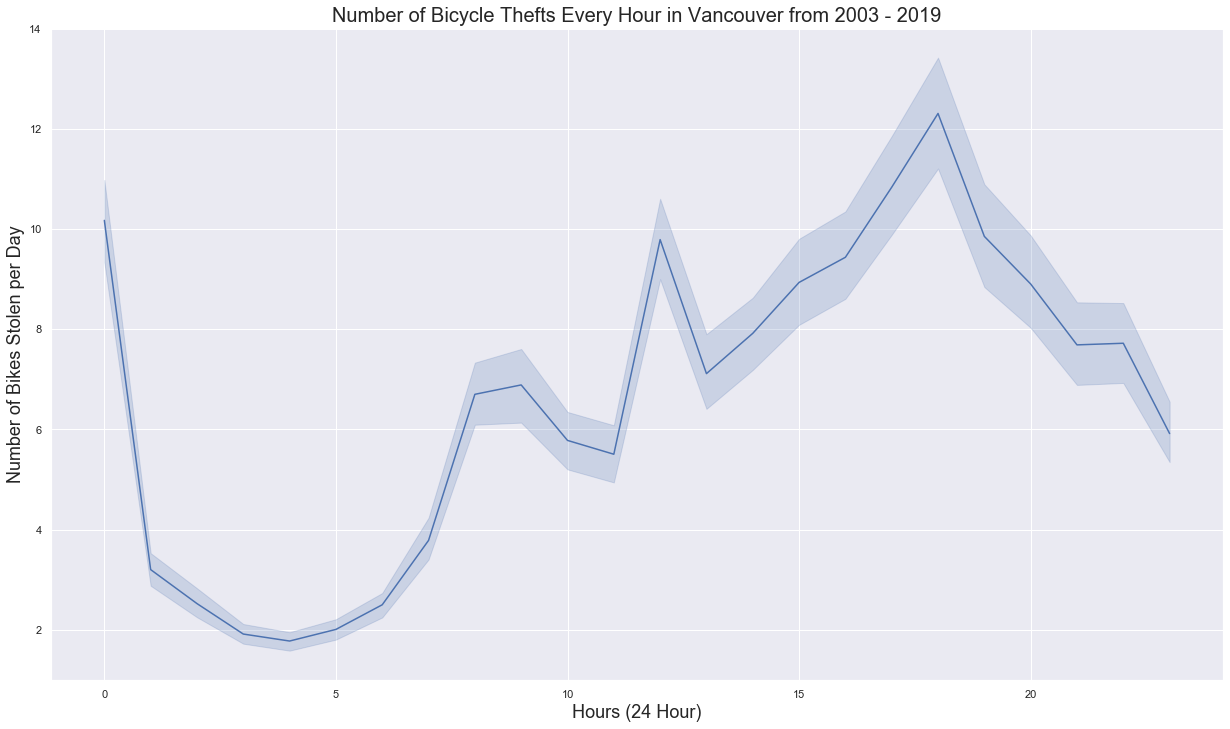

In [9]:
plt.figure(figsize=(21, 12))

ax = sns.lineplot(data=df_hours, x="HOUR", y="COUNT")
ax.set_xlabel("Hours (24 Hour)", size=18)
ax.set_ylabel("Number of Bikes Stolen per Day", size=18)
ax.set_title("Number of Bicycle Thefts Every Hour in Vancouver from 2003 - 2019", size=20)

plt.show()

       COUNT                                                                 \
YEAR    2003   2004   2005   2006   2007   2008   2009   2010   2011   2012   
MONTH                                                                         
1       95.0   41.0   51.0   66.0   57.0   44.0   29.0   51.0   38.0   76.0   
2       71.0   56.0   52.0   82.0   56.0   45.0   52.0   68.0   47.0   93.0   
3       76.0   99.0   82.0   93.0   71.0   60.0   42.0   87.0   58.0   91.0   
4       97.0   92.0   75.0   79.0   81.0   77.0  127.0  127.0   84.0  111.0   
5      114.0  109.0  132.0  102.0  106.0  133.0  185.0  143.0   99.0  174.0   
6      154.0  122.0  149.0  196.0  137.0  118.0  166.0  138.0  174.0  170.0   
7      188.0  198.0  158.0  237.0  167.0  178.0  283.0  231.0  297.0  250.0   
8      190.0  154.0  195.0  221.0  197.0  154.0  308.0  303.0  249.0  289.0   
9      157.0  127.0  180.0  133.0  129.0  159.0  183.0  221.0  171.0  235.0   
10     143.0  105.0  159.0  128.0  105.0  117.0  110

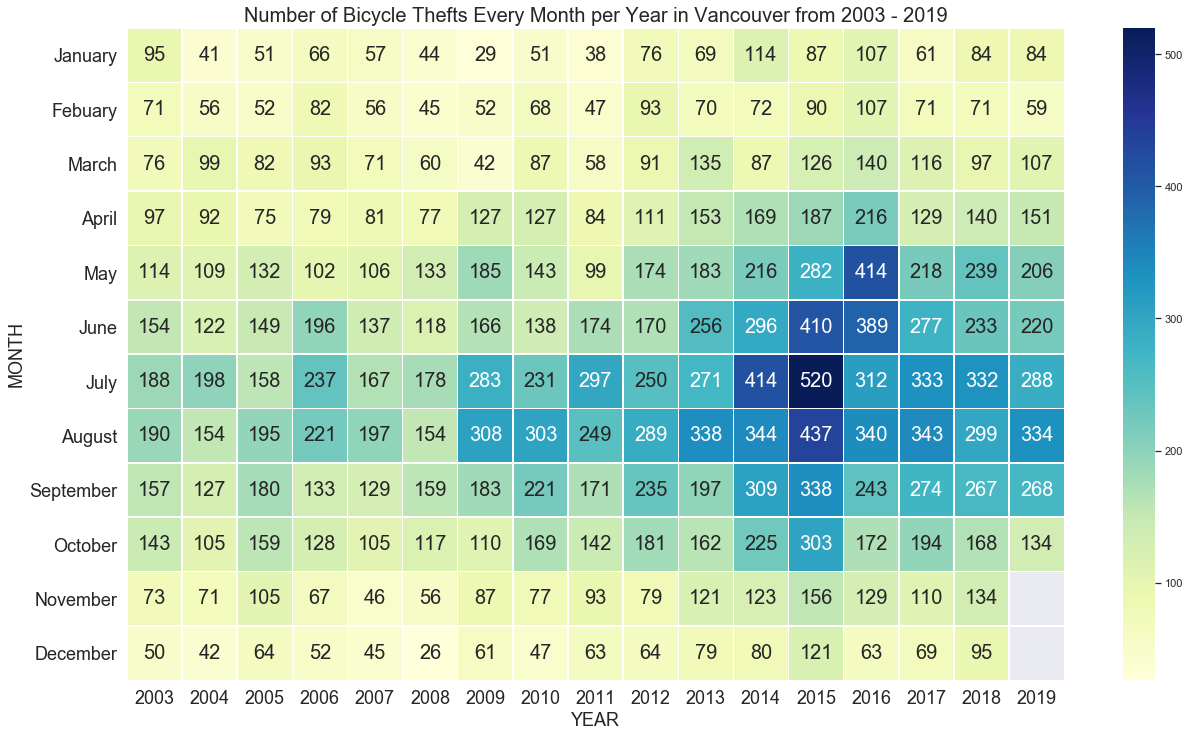

In [52]:
c = data.groupby([data["YEAR"], data["MONTH"]]).size().reset_index(name='COUNT')

test = c.pivot_table(["COUNT"], "MONTH", "YEAR")
print(test)

plt.figure(figsize=(21, 12))
x_axis_labels = [2003,
                 2004,
                 2005,
                 2006,
                 2007,
                 2008,
                 2009,
                 2010,
                 2011,
                 2012,
                 2013,
                 2014,
                 2015,
                 2016,
                 2017,
                 2018,
                 2019]
y_axis_labels = ["January",
                 "Febuary",
                 "March",
                 "April",
                 "May",
                 "June",
                 "July",
                 "August",
                 "September",
                 "October",
                 "November",
                 "December"]


g = sns.heatmap(test, annot=True, cmap="YlGnBu", linewidths=.5, fmt=".0f", annot_kws={"size": 20},
            xticklabels=x_axis_labels,
           yticklabels=y_axis_labels)
g.set_xlabel("YEAR", size=18)
g.set_ylabel("MONTH", size=18)
g.set_title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019", size=20)

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.setp(g.get_yticklabels(), rotation=0, fontsize=18)
plt.setp(g.get_xticklabels(), rotation=0, fontsize=18)
plt.savefig('heatmap.png')

In [11]:
data['DATETIME'] =  pd.to_datetime(data['DATETIME'], infer_datetime_format=True)

    MONTH  COUNT
0       1    434
1       2    482
2       3    610
3       4    755
4       5   1024
5       6   1180
6       7   1640
7       8   1722
8       9   1289
9      10   1036
10     11    582
11     12    387


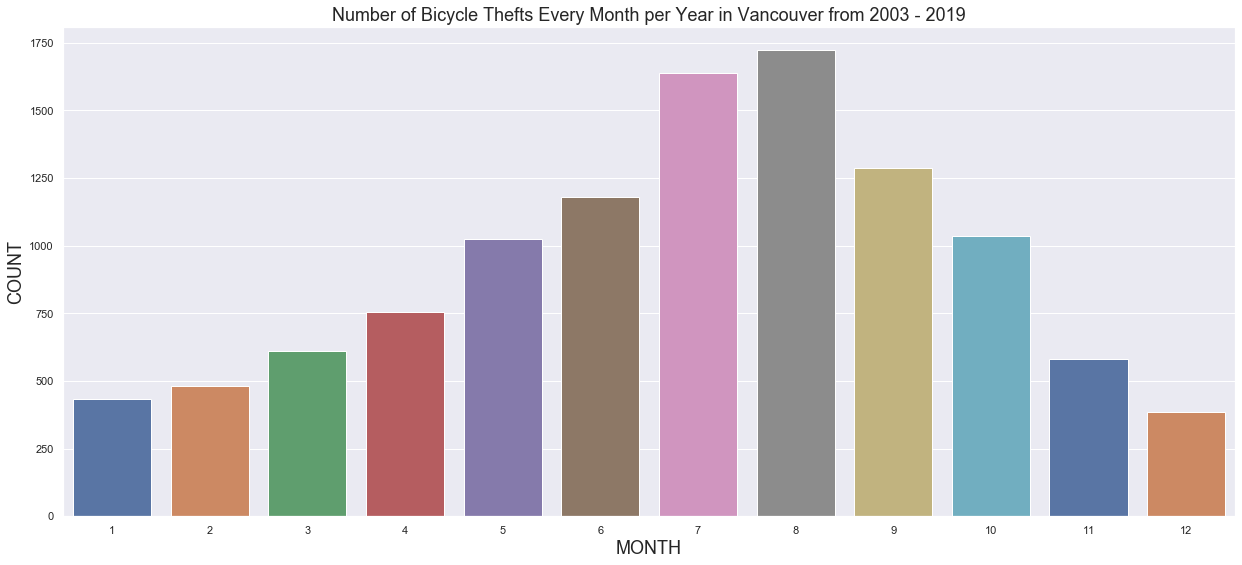

    MONTH  COUNT
0       1    720
1       2    680
2       3    957
3       4   1340
4       5   2031
5       6   2425
6       7   3017
7       8   2973
8       9   2302
9      10   1681
10     11    945
11     12    634


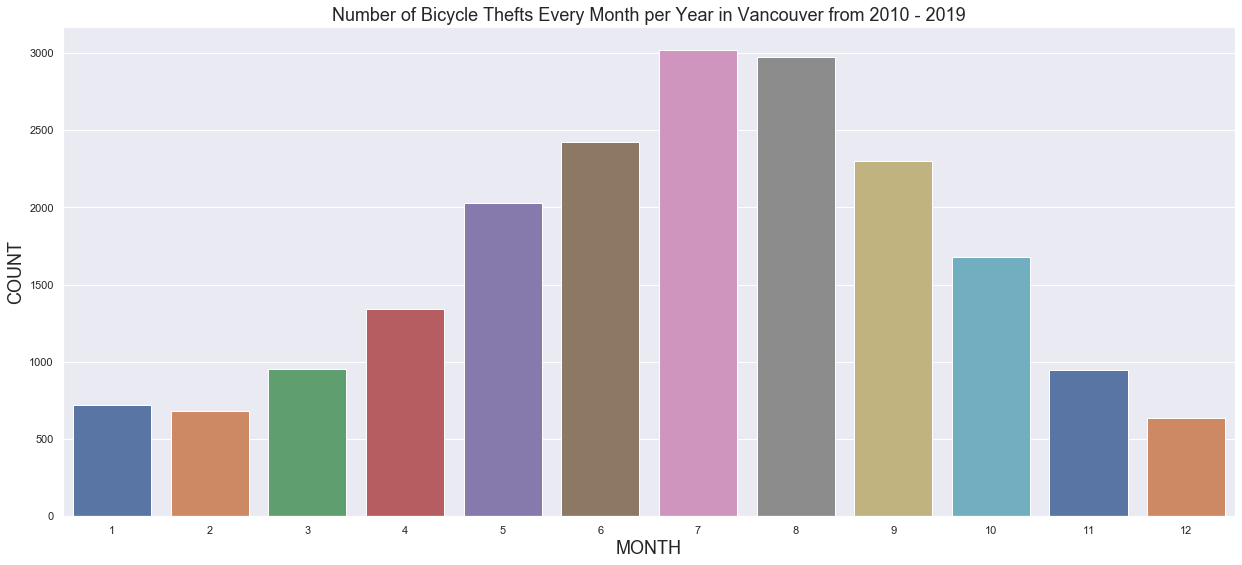

2003-2009 P_value:  0.5028930491622587
2009-2019 P_value:  0.27203489423896127
Mann P_value:  0.020202059794111847
Tail test:  1.0


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  "anyway, n=%i" % int(n))


In [12]:
# We have so much data, we have to apply the central limit theorem.
# To us, it looks pretty normal

sns.set()


early = data[data["YEAR"] < 2011]
early_agg = early.groupby(early["MONTH"]).size().reset_index(name="COUNT")
print(early_agg)
plt.figure(figsize=(21, 9))
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019",
          fontsize=18)
plt.xlabel("Years",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
sns.barplot(early_agg['MONTH'], early_agg['COUNT'],
        palette='deep')
plt.show()


late = data[data["YEAR"] >= 2011]
late_agg = late.groupby(late["MONTH"]).size().reset_index(name="COUNT")
print(late_agg)
plt.figure(figsize=(21, 9))
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2010 - 2019",
          fontsize=18)
plt.xlabel("Years",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
sns.barplot(late_agg['MONTH'], late_agg['COUNT'], palette="deep")
plt.show()


# Check if these two graphs are normal?
# They are both not normal
p_value = stats.normaltest(early_agg["COUNT"]).pvalue
print("2003-2009 P_value: ", p_value)

p_value = stats.normaltest(late_agg["COUNT"]).pvalue
print("2009-2019 P_value: ", p_value)

# The Central Limit Theorem, it's probably good enough but let's do one more test

# Our data is sortable, so we can use the mannwhitney u test
utest_p = stats.mannwhitneyu(early_agg["COUNT"].sort_values(), late_agg["COUNT"].sort_values()).pvalue
print("Mann P_value: ", utest_p)


ttest = stats.ttest_ind(early_agg['MONTH'], late_agg['MONTH'])
print("Tail test: ", ttest.pvalue)

    MONTH  COUNT
0       1   1154
1       2   1162
2       3   1567
3       4   2095
4       5   3055
5       6   3605
6       7   4657
7       8   4695
8       9   3591
9      10   2717
10     11   1527
11     12   1021


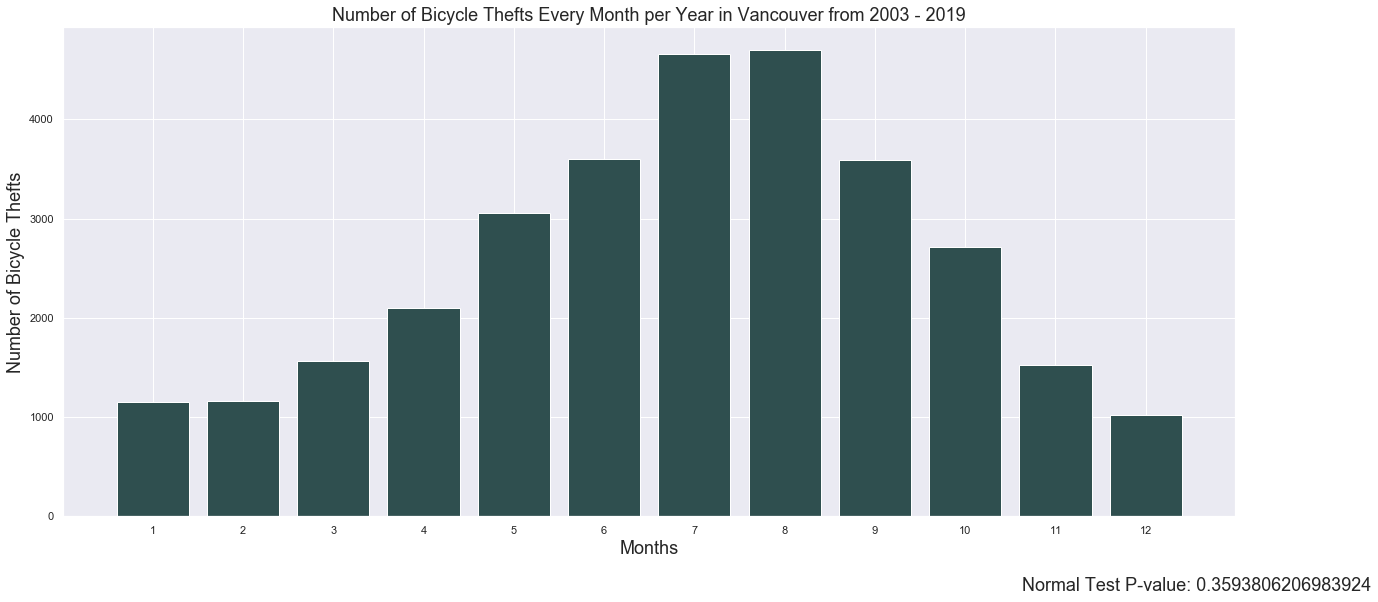

In [13]:
dd = data.groupby(data["MONTH"]).size().reset_index(name="COUNT")
print(dd)

# Calculate P-value from Normal Test
p_value = stats.normaltest(dd["COUNT"]).pvalue

# Configure Plots
plt.figure(figsize=(21, 9))
plt.bar(dd['MONTH'], dd['COUNT'],
        color='darkslategrey')
plt.xticks(dd['MONTH'])
plt.xlabel("Months",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019",
          fontsize=18)
plt.figtext(0.99, 0.01,
            'Normal Test P-value: ' + str(p_value),
            horizontalalignment='right',
            fontsize=18)
plt.show()

Data Frame:       YEAR  MONTH  COUNT  PREDICTION
0    2003      1     95   93.771020
1    2003      2     71   93.771020
2    2003      3     76   93.771020
3    2003      4     97   93.771020
4    2003      5    114   93.771020
..    ...    ...    ...         ...
197  2019      6    220  212.813559
198  2019      7    288  212.813559
199  2019      8    334  212.813559
200  2019      9    268  212.813559
201  2019     10    134  212.813559

[202 rows x 4 columns]
Linear Regression p-value: 1.7983968064581783e-08


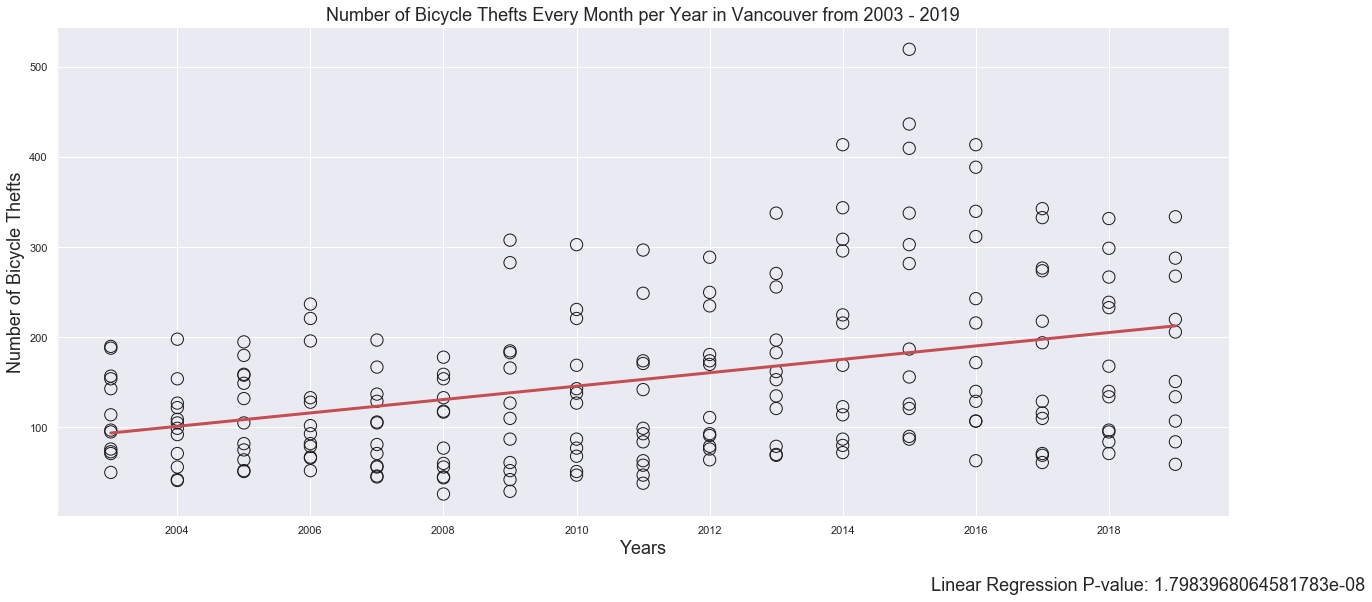

In [14]:
# Create a dataframe aggregating the year and month count
c = data.groupby([data["YEAR"], data["MONTH"]]).size().reset_index(name='COUNT')

# Calculate the linear regression
r = linregress(c["YEAR"], c['COUNT'])
c['PREDICTION'] = r.slope * c['YEAR'] + r.intercept

print("Data Frame: ", c)
print("Linear Regression p-value:", r.pvalue)


# Configure Plot
plt.figure(figsize=(21, 9))
plt.title("Number of Bicycle Thefts Every Month per Year in Vancouver from 2003 - 2019",
          fontsize=18)
plt.xlabel("Years",
           fontsize=18)
plt.ylabel("Number of Bicycle Thefts",
           fontsize=18)
plt.scatter(c['YEAR'], c['COUNT'],
            color='k',
            marker='o',
            facecolors='none',
            edgecolors='k',
            s=150)
plt.plot(c['YEAR'], c["PREDICTION"],
         'r-',
         linewidth=3)
plt.figtext(0.99, 0.01,
            'Linear Regression P-value: ' + str(r.pvalue),
            horizontalalignment='right',
            fontsize=18)
plt.savefig('yearly_linear_regression.png')